# Кейс для кандидата на позицию HR-аналитика

## Материалы

1. [Дашборд](https://datalens.yandex.cloud/0htgfxfw6mj4m)
2. [Презентация](https://drive.google.com/file/d/1T7wd24DJcwd8kycsfaGiiGcNDLHRK3u9/view?usp=sharing)

## Оглавление

1. [Цель исследования](#goal)
2. [Описание данных](#description)
3. [Ход исследования](#project)
    * [Загрузка данных](#start)
    * [Изучение общей информации и предобработка данных](#preprocessing)
    * [Базовые вопросы](#basis)
        * [Как оценить общее «здоровье» компании?](#health)
        * [Каков текущий уровень текучести персонала?](#turnover)
        * [Можно ли выделить факторы, связанные с текучестью?](#turnover_factors)
        * [Что можно сказать о распределении фонда оплаты труда (ФОТ)?](#salary)
        * [Какие факторы влияют на эффективность сотрудников (Performance Score)?](#perfomance)
    * [Продвинутые вопросы](#advanced)
        * [Предложи модель прогноза эффективности сотрудников.](#perf_modal)
        * [Представь, что в прошлом году в одном из департаментов было внедрено новое обучение. Придумай, как можно оценить эффективность этой меры. Смоделируй на данных.](#education)
        * [Какие ограничения есть у твоих данных? Какие выводы ты не стал бы делать? Как избежать ошибочной интерпретации результатов?](#turnover_factors)

## <a id='goal'> Формулировка задачи </a>  

Ты — HR-аналитик в компании X. К тебе обратились коллеги с массивом данных https://www.kaggle.com/datasets/rhuebner/human-resources-data-set и рядом вопросов, требующих аналитического взгляда и бизнес-интерпретации.

### Базовые вопросы:

1.	Как оценить общее «здоровье» компании?
2.	Каков текущий уровень текучести персонала?
3.	Можно ли выделить факторы, связанные с текучестью?
4.	Что можно сказать о распределении фонда оплаты труда (ФОТ)?
5.	Какие факторы влияют на эффективность сотрудников (`Performance Score`)?

### Продвинутые вопросы:

1.	Предложи модель прогноза эффективности сотрудников.
2.	Представь, что в прошлом году в одном из департаментов было внедрено новое обучение. Придумай, как можно оценить эффективность этой меры. Смоделируй на данных.
3.	Какие ограничения есть у твоих данных? Какие выводы ты не стал бы делать? Как избежать ошибочной интерпретации результатов?

### Требования к результату:

1.	Интерактивный дашборд (используй любую платформу)
2.	Анализ с использованием Python или R (ipynb, markdown, pdf)
3.	Сделай краткую презентацию (до 2 слайдов) с основными выводами и рекомендациями для бизнеса. Подумай, какие решения может принять руководство на основе твоих данных.

## <a id='description'> Описание данных </a>  

Датасет включает в себя имена сотрудников вымышленной компании, даты рождения, возраст, пол, семейное положение, дату приема на работу, причины увольнения, отдел, статус активности сотрудника («действующий» или «уволенный»), должность, ставку оплаты труда, имя руководителя и оценку производительности.

- `Employee_Name`	- Полное имя сотрудника
- `Employee_SecondName` - Фамилия
- `Employee_FirstName` -	Имя
- `EmpID` -	ТН
- `MarriedID` -	В браке/ не в браке ID
- `MaritalStatusID` -	Семейное положение ID
- `GenderID` -	Пол ID
- `EmpStatusID` -	Статус активности сотрудника ID
- `DeptID` -	Подразделение ID
- `PerfScoreID` -	Оценка производительности ID
- `FromDiversityJobFairID` -	ID
- `Salary` -	Заработная плата
- `Termd` -	Маркер уволенного
- `PositionID` -	Должность ID
- `Position` -	Должность
- `State` -	Штат
- `Zip` -	Почтовый индекс
- `DOB` -	Дата рождения
- `Sex` -	Пол
- `MaritalDesc` -	Семейное положение
- `CitizenDesc` -	Гражданство
- `HispanicLatino`
- `RaceDesc` -	Раса
- `DateofHire` -	Дата приема
- `DateofTermination` -	Дата увольнения
- `TermReason` -	Причина увольненя
- `EmploymentStatus` -	Статус сотрудника
- `Department` -	Подразделение
- `ManagerName` -	Имя руководителя
- `ManagerID` -	Руководитель ID
- `RecruitmentSource` -	Источник найма
- `PerformanceScore` -	Оценка производительности
- `EngagementSurvey` -	Опрос вовлеченности
- `EmpSatisfaction` -	Удовлетворенность сотрудника
- `SpecialProjectsCount` -	Количество спец проектов
- `LastPerformanceReview_Date` -	Дата последней оценки эффективности
- `DaysLateLast30` -	Опоздания за последние 30 дней
- `Absences` - Отсутствия


## <a id='project'> Ход исследования </a>  

### <a id='start'> Загрузка данных </a>  

In [ ]:
# импортируем все библиотеки, которые будут нужны для выполнения исследования

import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st

from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# откроем рабочий файл (если работаем в Google Colab)

import gdown

file_id = '1h4QgakJqm_P-0bVbRS7LWryPJWMwascs'
url = f'https://drive.google.com/uc?id={file_id}'

# Скачиваем файл
output = 'file.csv'
gdown.download(url, output, quiet=False)

# Читаем CSV-файл
dataset_raw = pd.read_csv(output)

# откроем рабочий файл (если работаем в Jupyter Notebook)

#dataset_raw = pd.read_csv('HRDataset_v14.csv')

Downloading...
From: https://drive.google.com/uc?id=1h4QgakJqm_P-0bVbRS7LWryPJWMwascs
To: /content/file.csv
100%|██████████| 76.9k/76.9k [00:00<00:00, 20.4MB/s]


In [ ]:
# создадим копии датафреймов

dataset = dataset_raw.copy(deep=True)

### <a id='preprocessing'> Изучение общей информации и предобработка данных </a>

In [ ]:
# создадим функцию для вывода предобработки данных

def info(data):
    # посмотрим общую информацию о файле
    print('Общая информация о датафрейме:')
    data.info()

    # выведем на экран 5 строчек таблицы

    pd.options.display.max_colwidth = 100
    pd.set_option('display.max_columns', None)
    display(data.head(5))

    # посчитаем количество пропущенных значений

    print('Количество пропущенных значений:')
    print(data.isna().sum().sort_values(ascending=False))

    # посчитаем количество полных дубликатов

    print()
    print('Количество полных дубликатов: ', data.duplicated().sum())

In [ ]:
# рассмотрим датафрейм dataset

# info(dataset)

In [ ]:
# приведем дату в колонках DateofTermination, DateofHire, LastPerformanceReview_Date, DOB к типу date

dataset['DOB'] = dataset['DOB'].apply(lambda x: dt.strptime(x, '%m/%d/%y').date())
dataset['DOB'] = dataset['DOB'].apply(lambda x: x.replace(year = x.year - 100) if x.year > dt.today().year else x)
dataset['DateofHire'] = dataset['DateofHire'].apply(lambda x: dt.strptime(x, '%m/%d/%Y').date())
dataset['DateofTermination'] = dataset['DateofTermination'].apply(lambda x: dt.strptime(x, '%m/%d/%Y').date()
                                                                  if not pd.isnull(x) else pd.NaT)
dataset['LastPerformanceReview_Date'] = dataset['LastPerformanceReview_Date'].apply(lambda x: dt.strptime(x, '%m/%d/%Y').date()
                                                                                    if not pd.isnull(x) else pd.NaT)

In [ ]:
# заполним пропуски в столбцы ИД руководителя

dataset['ManagerID'] = dataset['ManagerID'].fillna(0)

In [ ]:
# добавим столбцы с возрастом сотрудников

dataset['AgeFullYears'] = dataset['DOB'].apply(lambda x: relativedelta(dt.today().date(), x).years)

In [ ]:
# добавим столбцы со стажем работы

dataset['WorkExpYears'] = dataset.apply(lambda x: ((x['DateofTermination']
                                                    if not pd.isnull(x['DateofTermination'])
                                                    else dt.today().date()) -
                                                   x['DateofHire']).days / 365.25,
                                        axis=1)

In [ ]:
# выделим в столбец год увольнения

dataset['YearofTermination'] = dataset['DateofTermination'].apply(lambda x: x.year)

In [ ]:
# добавим столбец с маркировкой сотрудников

dataset['Cnt'] = 1

In [ ]:
# определение границ возрастных групп
bins = [0, 20, 30, 40, 50, float('inf')]  # Границы возрастов: '<20', '20-29', '30-39', '40+'
labels = ['<20', '20-29', '30-39', '40-50', '50+']  # Названия возрастных групп

# Создание нового столбца с возрастными группами
dataset['AgeFullYearsGroup'] = pd.cut(dataset['AgeFullYears'], bins=bins, labels=labels, right=False)

In [ ]:
# определение границ стажа
bins = [0, 0.25, 1, 3, 5, 10, float('inf')]  # Границы возрастов: '<20', '20-29', '30-39', '40-49', '50+'
labels = ['<3 мес.', 'до года', '1-3 года', '3-5 лет', '5-10 лет', 'более 10 лет']  # Названия возрастных групп

# Создание нового столбца с возрастными группами
dataset['WorkExpYearsGroup'] = pd.cut(dataset['WorkExpYears'], bins=bins, labels=labels, right=False)

In [ ]:
# сохраняем файл на локальный компьютер

# dataset.to_excel('HRdata_prepared.xlsx')

**Вывод:**
1. Датасет был изучен, проведена предобработка.
2. Пропусков в данных и полных дубликатов обнаружено не было
3. Столбцы *DateofTermination*, *DateofHire*, *LastPerformanceReview_Date*, *DOB* в датасете *dataset* переведены в формат *datetime* с учетом разных форматов записей

# <a id='basis'> Базовые вопросы </a>  

## <a id='health'> Как оценить общее «здоровье» компании? </a>

Оценить общее здоровье компании по HR-данным можно с помощью анализа ключевых показателей, отражающих стабильность, вовлечённость, удовлетворённость и эффективность персонала.

### Ответ на вопрос:

Плюсы:

* Хороший уровень вовлеченности персонала - 4.12.
* 92% сотрудников эффективны.
* В компании соблюдается дисциплина: 0.3 дней опозданий в среднем на сотрудника за последние 30 дней.
* Гендерное равенство.

Минусы и зоны роста:
* Рост текучести на 2.5 п.п. относительно прошлого года.
* Рост числа увольнения по инициативе работодателя.
* Удовлетворенность сотрудников 3.89.
* Недостаточное расовое разнообразие.
* В команде нет новых и молодых специалистов — риск стагнации, недостатка инноваций.

Ниже приведены таблицы, графики и выводы, которые подробно раскрывают каждый из пунктов.

## <a id='health'> Каков текущий уровень текучести персонала? </a>

### Ответ на вопрос:

В 2018 году (последний год в датасете) текучесть составляет - 6.1%. Это выше, чем в 2017 году на 2.5 п.п. Возросло количество недобровольных увольнений (по инициативе работодателя) - 31%. Значительно увеличилось количество опозданий и снизилась вовлеченность у уволенных сотрудников.

In [ ]:
# рассчитаем количество уволенных по годам и подразделениям

terminations = pd.pivot_table(
    dataset,
    values = ['Termd'],
    index = ['YearofTermination', 'Department', 'Position'],
    aggfunc = "sum"
).reset_index()
terminations['YearofTermination'] = terminations['YearofTermination'].astype(int)
terminations_raw = terminations.rename(columns={'YearofTermination': 'Year', 'Termd': 'Terminations'})

In [ ]:
# рассчитаем средние показатели уволенных: удовлетворенность, вовлеченность, производительность, кол-во специальных проектов, опозданий и отсутствий

features_term = dataset[dataset['Termd'] == 1].groupby('YearofTermination')[['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences', 'WorkExpYears']].mean().round(2). reset_index()

features_term = features_term.rename(columns={'YearofTermination':'Year'})

In [ ]:
# причины ухода сотрудников

reasons = dataset[dataset['Termd'] == 1]['TermReason'].unique()

In [ ]:
# рассчитаем наиболее популярную причину увольнения по годам

reasons_term_1 = pd.pivot_table(
    dataset[dataset['Termd'] == 1],
    values = ['TermReason'],
    index = ['YearofTermination'],
    aggfunc=lambda x: x.mode()
).reset_index().rename(columns={'TermReason': 'TermReason_mode'})

reasons_term_2 = pd.pivot_table(
    dataset[dataset['Termd'] == 1],
    values = ['TermReason'],
    index = ['YearofTermination'],
    aggfunc=lambda x: x.value_counts().iloc[0]
).reset_index().rename(columns={'TermReason': 'TermReason_value_count'})

reasons_term = pd.merge(reasons_term_1, reasons_term_2, on='YearofTermination').rename(columns={'YearofTermination': 'Year'})
#reasons_term

In [ ]:
# сводная таблица по увольнениям

terminations = terminations_raw.merge(features_term, on='Year', how='left')
terminations = reasons_term.merge(terminations, on='Year', how='left')

terminations['Year'] = terminations['Year'].astype(int)
#terminations

In [ ]:
# рассчитаем среднесписочную численность по годам

# список уникальных годов
years = dataset['DateofHire'].apply(lambda x: x.year).unique()

# список подразделений
deps = dataset['Department'].unique()

# список должностей
positions = dataset['Position'].unique()

def count_employees_at_start_and_end(year, department, position):
    start_year = date(int(year), 1, 1)
    end_year = date(int(year), 12, 31)

    # Число сотрудников на начало года в данном подразделении
    employees_on_start = len(dataset[
        (dataset['Department'] == department) & (dataset['Position'] == position) &
        (dataset['DateofHire'] <= start_year) &
        ((dataset['DateofTermination'].isna()) | (dataset['DateofTermination'] > start_year))
    ])

    # Число сотрудников на конец года в данном подразделении
    employees_on_end = len(dataset[
        (dataset['Department'] == department) & (dataset['Position'] == position) &
        (dataset['DateofHire'] <= end_year) &
        ((dataset['DateofTermination'].isna()) | (dataset['DateofTermination'] > end_year))
    ])

    return year, department, position, employees_on_start, employees_on_end

# Применяем функцию ко всем годам и подразделениям
result = []
for y in years:
    for dep in deps:
        for pos in positions:
            result.append(count_employees_at_start_and_end(y, dep, pos))

# Формируем итоговый DataFrame
result_df = pd.DataFrame(result, columns=['Year', 'Department', 'Position', 'EmployeesAtStart', 'EmployeesAtEnd'])

# Рассчитываем среднюю численность
result_df['AvgCnt'] = (result_df['EmployeesAtStart'] + result_df['EmployeesAtEnd']) / 2

# Сортируем по году и подразделению
result_df = result_df.sort_values(by=['Year', 'Department', 'Position']).reset_index(drop=True)

#result_df

In [ ]:
# сводная таблица с увольнениями по годам (до должностей)

turnovers_raw = result_df.merge(terminations, on=['Year', 'Department', 'Position'], how='left')
turnovers_raw['Turnover'] = turnovers_raw['Terminations']/turnovers_raw['AvgCnt']

turnovers_raw.head()
#turnovers_raw.to_excel('turnovers.xlsx')

,Year,Department,Position,EmployeesAtStart,EmployeesAtEnd,AvgCnt,TermReason_mode,TermReason_value_count,Terminations,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,WorkExpYears,Turnover
0,2006,Admin Offices,Accountant I,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,Admin Offices,Administrative Assistant,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,Admin Offices,Area Sales Manager,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,Admin Offices,BI Developer,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,Admin Offices,BI Director,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_df_pivot = pd.pivot_table(
    result_df,
    values = ['AvgCnt'],
    index = ['Year'],
    aggfunc='sum',
    fill_value=0
).reset_index().sort_values(by='Year', ascending=False)
#result_df_pivot

In [ ]:
terminations_pivot = pd.pivot_table(
    terminations,
    values = ['Terminations'],
    index = ['Year'],
    aggfunc='sum',
    fill_value=0
).reset_index().sort_values(by='Year', ascending=False)
#terminations_pivot

In [ ]:
# соединим таблицы с уволенными и среднесписочной численностью, рассчитаем текучесть по годам

turnovers = result_df_pivot.merge(terminations_pivot, on='Year', how='left')
turnovers['Turnover'] = turnovers['Terminations']/turnovers['AvgCnt']
#turnovers_formated = turnovers.style.format({"Turnover": "{:.2%}"})

turnovers

,Year,AvgCnt,Terminations,Turnover
0,2018,213.0,13.0,0.061033
1,2017,220.0,8.0,0.036364
2,2016,225.0,22.0,0.097778
3,2015,222.5,23.0,0.103371
4,2014,192.5,13.0,0.067532
5,2013,153.5,13.0,0.084691
6,2012,119.5,8.0,0.066946
7,2011,61.0,3.0,0.049180
8,2010,17.0,1.0,0.058824
9,2009,9.5,NaN,NaN


In [ ]:
# выведем график текучести персонала по годам

# Создание многоуровневой фигуры
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Добавляем линейный график слева (первичная ось Y)
fig.add_trace(
    go.Scatter(x=turnovers['Year'], y=(turnovers['Turnover']*100).round(2), name="Текучесть, %", marker_color='#9400D3'),
    secondary_y=True
)

# Добавляем столбчатую диаграмму справа (вторичная ось Y)
fig.add_trace(
    go.Bar(x=turnovers['Year'],y=turnovers['Terminations'], name="Количество уволенных", marker_color='#D3D3D3'),
    secondary_y=False
)

# Заголовки осей
fig.update_layout(
    title_text="Динамика текучести и количества уволенных по годам",
    xaxis_title="Год",
    yaxis_title="Текучесть, %",
    yaxis2_title="Количество уволенных"
)


# Показ графика
fig.show()

In [ ]:
# посчитаем количество уволенных по собств. желанию и по инициативе работодателя

terminations_reasons_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 1],
    values = ['Cnt'],
    index = ['YearofTermination', 'EmploymentStatus'],
    aggfunc='sum',
    fill_value=0
).reset_index().sort_values(by='YearofTermination')

In [ ]:
fig = px.bar(terminations_reasons_pivot,
             x='YearofTermination',
             y='Cnt',
             color='EmploymentStatus',
             title='Количество увольнений по годам в разрезе типов',
             labels={'Value': 'Значение', 'Category': 'Категория', 'Type': 'Тип'},
             barmode='stack')  # ключевой параметр для накопления

# Заголовки осей
fig.update_layout(
    xaxis_title="Год",
    yaxis_title="Количество уволенных"
)

fig.show()

In [ ]:
# средние показатели уволенных сотрудников

features_term

,Year,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,WorkExpYears
0,2010.0,3.00,4.10,4.00,0.00,0.00,15.00,3.18
1,2011.0,2.33,3.90,3.67,0.00,1.00,8.67,0.75
2,2012.0,2.88,3.84,3.75,0.00,0.38,9.88,1.02
3,2013.0,3.00,4.13,4.08,0.62,0.31,14.31,1.85
4,2014.0,2.85,4.15,4.00,0.00,0.54,11.62,2.61
5,2015.0,2.91,4.11,3.91,1.17,0.83,9.13,3.41
6,2016.0,3.05,4.24,3.77,1.05,0.41,11.14,4.01
7,2017.0,2.88,4.26,3.88,0.88,0.50,10.62,5.41
8,2018.0,2.77,3.80,3.85,0.85,1.54,11.69,6.04


**Вывод:**
До 2015 года численность компании стремительно росла и росла текучесть персонала. Максимальный показатель текучести был достигнут в 2015 году и составил 10.3% и 5 (21.7%) сотрудников были уволены по инициативе работодателя. Для небольшой компании (~ 220 сотрудников) в период активного роста такой показатель текучести не является критичным. В фазе роста часто сталкиваются с повышенной текучестью из-за адаптации процессов и смены требований к персоналу. В 2015-2017 гг численность компании стабильна, в 2017 году показатель текучести составил 3.6% - минимальное значение за историю наблюдений. В 2018 году количество сотрудников сокращается, и текучесть растет - 6.1%. Возросло количество недобровольных увольнений (по инициативе работодателя) - 31%. Значительно увеличилось количество опозданий (+1.04 YoY) и снизилась вовлеченность (-0.46 YoY). Это может свидетельствовать о возможной реструктуризации, изменении стратегии или внутренних проблемах.

In [ ]:
reasons_term_3 = pd.pivot_table(
    dataset,
    values = ['Termd'],
    index = ['YearofTermination', 'TermReason'],
    aggfunc='sum',
    fill_value=0
).reset_index().sort_values(by=['YearofTermination','Termd'], ascending=False)

#reasons_term_3

In [ ]:
fig = px.bar(reasons_term_3,
             x='YearofTermination',
             y='Termd',
             color='TermReason',
             title='Причины увольнения по годам',
             labels={'Value': 'Значение', 'Category': 'Категория', 'Type': 'Тип'},
             barmode='stack')  # ключевой параметр для накопления

# Заголовки осей
fig.update_layout(
    xaxis_title="Год",
    yaxis_title="Количество уволенных"
)

fig.show()

In [ ]:
# количество уволенных в разрезе стажа работы

work_esp_raw = pd.pivot_table(
    dataset[dataset['Termd'] == 1],
    values = ['Cnt'],
    index = ['WorkExpYearsGroup'],
    aggfunc = 'sum',
    observed=False
).reset_index()

#columns = ['term_year'],
work_esp_raw

,WorkExpYearsGroup,Cnt
0,<3 мес.,3
1,до года,6
2,1-3 года,34
3,3-5 лет,35
4,5-10 лет,26
5,более 10 лет,0


**Вывод:**
Самая высокая текучесть кадров наблюдалась в 2015-16 гг и топ-3 причин были:
* сотрудник чувствовал себя несчастно
* переход на другую позицию
* посещаемость

Чувство несчастья, переход на другую позицию и проблемы с посещаемостью — это индикаторы того, что в 2015–2016 годах были сложности с вовлечённостью, корпоративной культурой или условиями труда.

Важно, что среди причин не доминируют конфликты или неудовлетворённость оплатой — значит, базовые условия труда были на приемлемом уровне, но есть зона роста в поддержке сотрудников, развитии и работе с мотивацией.

##### Уровень удовлетворённости и вовлечённости сотрудников, производительность и эффективность, абсентеизм и опоздания

In [ ]:
# рассчитаем показатель удовлетворености действующего персонала EmpSatisfaction и вовлеченности EngagementSurvey по всей компании

features_active = dataset[dataset['Termd'] == 0].groupby('Termd')[['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences']].mean().round(2).reset_index()
del features_active['Termd']

features_active

,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,3.01,4.12,3.89,1.46,0.29,9.83


**Вывод:**

Общий показатель удовлетворенности действующих сотрудников компании составляет 3.89, что сигнализирует о необходимости обратить внимание на внутренние процессы, мотивацию и условия работы, поскольку уровень удовлетворенности становится средний.

В то же время вовлеченность персонала на уровне 4.12, это в целом хороший показатель.

Количество дополнительных проектов - 1.5 на сотрудника. Это говорит о проактивности и мотивированности сотрудников. Но, в то же время, большое количество доп. проектов может негативно влиять на нагрузку команды.

В компании не принято опаздывать - 0.3 дней в среднем на сотрудника за последние 30 дней. Это означает, что в компании соблюдается дисциплина.

Почти 10 дней отсутствия сотрудника в среднем. Для стандартного рабочего года (около 250 дней) нормой считается примерно 7–12 дней отсутствия на одного сотрудника в год (включая болезни, прогулы,несанкционированные и краткосрочные отпуска, но не включая отпуска по закону). Таким образом, этот показатель в норме.

In [ ]:
# рассчитаем показатель удовлетворености и вовлеченности EngagementSurvey по подразделениям

features_active_dep = dataset[dataset['Termd'] == 0].groupby('Department')[['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences']].mean().round(2).reset_index()
features_active_dep

,Department,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,Admin Offices,3.00,4.64,3.57,3.57,0.00,7.86
1,Executive Office,3.00,4.83,3.00,0.00,0.00,10.00
2,IT/IS,3.08,4.09,4.05,5.98,0.18,10.60
3,Production,3.03,4.15,3.87,0.03,0.30,9.46
4,Sales,2.81,3.86,3.88,0.00,0.58,11.65
5,Software Engineering,3.14,4.12,4.00,5.00,0.00,7.29


In [ ]:
# сформируем сводную таблицу с показателями подразделений по годам

dep_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 1],
    values = ['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences'],
    index = ['YearofTermination','Department'],
    aggfunc="mean"
).reset_index().round(2).sort_values(by='YearofTermination', ascending=False)
#dep_pivot

In [ ]:
terminations_dep = terminations.merge(result_df, on=['Year','Department'], how='left')
terminations_dep['Turnover'] = terminations_dep['Terminations']/terminations_dep['AvgCnt']
terminations_dep = terminations_dep.sort_values(by=['Year', 'Department'], ascending=False)

In [ ]:
# динамика численности подразделений по годам

cnt_dep = pd.pivot_table(
    terminations_dep,
    values = ['AvgCnt'],
    index = ['Department'],
    columns = ['Year'],
    aggfunc = 'sum'
).reset_index()

**Вывод:**

В разрезе подразделений самые низкие показатели у Sales: удовлетворенность и волвеченность ниже 4, при этом 11.65 дней отсутствия и ни одного доп. проекта. Опозданий у них также больше всего. Самое большое количество дополнительных проектов у IT-специалистов, что говорит об их высокой нагрузке. Но при этом у них самая высокая удовлетворенность.

##### Диверсификация и инклюзивность, структура и стабильность кадров

In [ ]:
# рассмотрим соотношения мужчин и женщин в компании, национальностей и пр.
# Sex, RaceDesc, MaritalDesc, CitizenDesc, age

# круговая диаграмма

def pie(labels, values, colors, text, title):
    colors = colors
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_traces(marker=dict(colors=colors), textinfo='percent+value')
    fig.update_layout(title=title, # указываем заголовок графика
                      width=600, # указываем размеры графика
                      height=500,
                      annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                        y=1.05,
                                        text=text,
                                        showarrow=False)])
    fig.show()

In [ ]:
# построим круговую диаграмму, отображающую соотношения мужчин и женщин в компании

colors = ['#4682B4', '#D8BFD8']
title = 'Гендерное соотношение'
text = 'Пол'
labels = dataset[dataset['Termd'] == 0]['Sex']
values = dataset[dataset['Termd'] == 0]['Cnt']

pie(labels, values, colors, text, title)

In [ ]:
# построим круговую диаграмму, отображающую семейное положение сотрудников

colors = ['#4682B4', '#D8BFD8', '#DCDCDC', '#7B68EE', '#6A5ACD', '#FFF0F5', '#808080']
title = 'Семейное положение'
text = 'Статус'
labels = dataset[dataset['Termd'] == 0]['MaritalDesc']
values = dataset[dataset['Termd'] == 0]['Cnt']

pie(labels, values, colors, text, title)

In [ ]:
# построим круговую диаграмму, отображающую соотношение граждан по статусу

colors = ['#4682B4', '#D8BFD8']
title = 'Гражданство'
text = 'Статус'
labels = dataset[dataset['Termd'] == 0]['CitizenDesc']
values = dataset[dataset['Termd'] == 0]['Cnt']

pie(labels, values, colors, text, title)

In [ ]:
# столбчатая диаграмма

def bar(data, x, y, text, title, xaxis_title, yaxis_title):
    fig = px.bar(data,
                 x=x, # указываем столбец с данными для оси X
                 y=y, # указываем столбец с данными для оси Y
                 text=text, # добавляем аргумент, который отобразит текст с информацией
                 color_discrete_sequence=px.colors.qualitative.Pastel1
                )
    # оформляем график

    fig.update_layout(title=title,
                       xaxis_title=xaxis_title,
                       yaxis_title=yaxis_title)

    fig.show() # выводим график

In [ ]:
# построим столбчатую диаграмму, отображащую соотношение рас

RaceDesc_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 0],
    values = ['Cnt'],
    index = ['RaceDesc'],
    aggfunc="sum"
).reset_index().sort_values(by='Cnt', ascending=False)
#RaceDesc_pivot

In [ ]:
x = 'RaceDesc'
y = 'Cnt'
color_continuous_scale = 'sunset'
title = 'Распределение сотрудников по расам'
xaxis_title = 'Раса'
yaxis_title = 'Количество сотрудников'

bar(RaceDesc_pivot, x, y, y, title, xaxis_title, yaxis_title)

In [ ]:
# построим круговую диаграмму, отображающую соотношение испанцев и латиноамериканцев относительно прочих

colors = ['#4682B4', '#D8BFD8']
title = 'Испанцы и латиноамериканцы относительно прочих'
text = 'Испанец/ латиноамериканец'
labels = dataset[dataset['Termd'] == 0]['HispanicLatino'].str.lower()
values = dataset[dataset['Termd'] == 0]['Cnt']

pie(labels, values, colors, text, title)

In [ ]:
# построим столбчатую диаграмму, отображащую распределение по возрастам

age_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 0],
    values = ['Cnt'],
    index = ['AgeFullYearsGroup'],
    aggfunc="sum",
    observed=False
).reset_index()
#age_pivot

In [ ]:
x = 'AgeFullYearsGroup'
y = 'Cnt'
color_continuous_scale = 'sunset'
title = 'Распределение сотрудников по возрастам'
xaxis_title = 'Возраст'
yaxis_title = 'Количество сотрудников'

bar(age_pivot, x, y, y, title, xaxis_title, yaxis_title)

In [ ]:
# построим столбчатую диаграмму, отображащую соотношение сотрудников по штатам

State_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 0],
    values = ['Cnt'],
    index = ['State'],
    aggfunc="sum"
).reset_index().sort_values(by='Cnt', ascending=False)
#State_pivot

In [ ]:
x = 'State'
y = 'Cnt'
color_continuous_scale = 'sunset'
title = 'Распределение сотрудников по штатам'
xaxis_title = 'Штат'
yaxis_title = 'Количество сотрудников'

bar(State_pivot, x, y, y, title, xaxis_title, yaxis_title)

In [ ]:
# построим столбчатую диаграмму, отображащую распределение сотрудников по стажу работы

exp_pivot = pd.pivot_table(
    dataset[dataset['Termd'] == 0],
    values = ['Cnt'],
    index = ['WorkExpYearsGroup'],
    aggfunc="sum",
    observed=False
).reset_index()
#exp_pivot

In [ ]:
x = 'WorkExpYearsGroup'
y = 'Cnt'
color_continuous_scale = 'sunset'
title = 'Распределение сотрудников по стажу работы'
xaxis_title = 'Стаж работы, лет'
yaxis_title = 'Количество сотрудников'

bar(exp_pivot, x, y, y, title, xaxis_title, yaxis_title)

**Вывод:**
Среди действующих сотрудников компании 56% женщин и 44% мужчин - это хороший баланс, компания может считаться гендерно-инклюзивной.

Что касается семейного положения, то 37.2% сотрудников женаты/ замужем и 72.8% не состоят в браке. Не критично, но может говорить о возрастной структуре или корпоративной культуре.

Преимущественно все сотрудники имеют гражданство США и проживают в штате Массачусетс.

60% сотрудников "белые", 24.6% афроамериканцы и примерно 10% - азиаты. Испанцев/ латиноамериканцев в компании менее 10%. расовое равенство не соблюдается, есть явный перевес в сторону одной группы. Это может быть вызовом для инклюзивности и корпоративной культуры, особенно если компания работает в мультикультурной среде.

Самому молодому сотруднику в команде 32 года, при этом в компании работает сотрудник в возрасте 74 лет, большинство сотрудников возраста 40-50 лет. 88% команды работает в компании уже более 10 лет, что показывает стабильность штата. Но в то же время при отсутствии новых и молодых сотрудников сложно находить инновационные решения, свежий взгляд на привычные процессы.

## <a id='turnover_factors'> Можно ли выделить факторы, связанные с текучестью?</a>

### Ответ на вопрос:

Наблюдается незначительная корреляция со следующими признаками: ManagerID (0.23), SpecialProjectsCount (-0.15), DaysLateLast30 (0.14), FromDiversityJobFairID (0.15). Таким образом, руководитель, количество доп. проектов, опоздания в последние 30 дней и источник найма (с ярмарки вакансий или нет) могут влиять на текучесть.

Сильная отрицательная корреляция выявлена с признаком work_exp (-0.89): чем меньше стаж, тем больше количество увольнений. 31.3% увольнений происходят в первые три года. При этом при анализе распределения сотрудников по стажу, мы видели, что у 88.4% сотрудников стаж более 10 лет. В компании новички отсутствуют.

In [ ]:
#dataset.columns

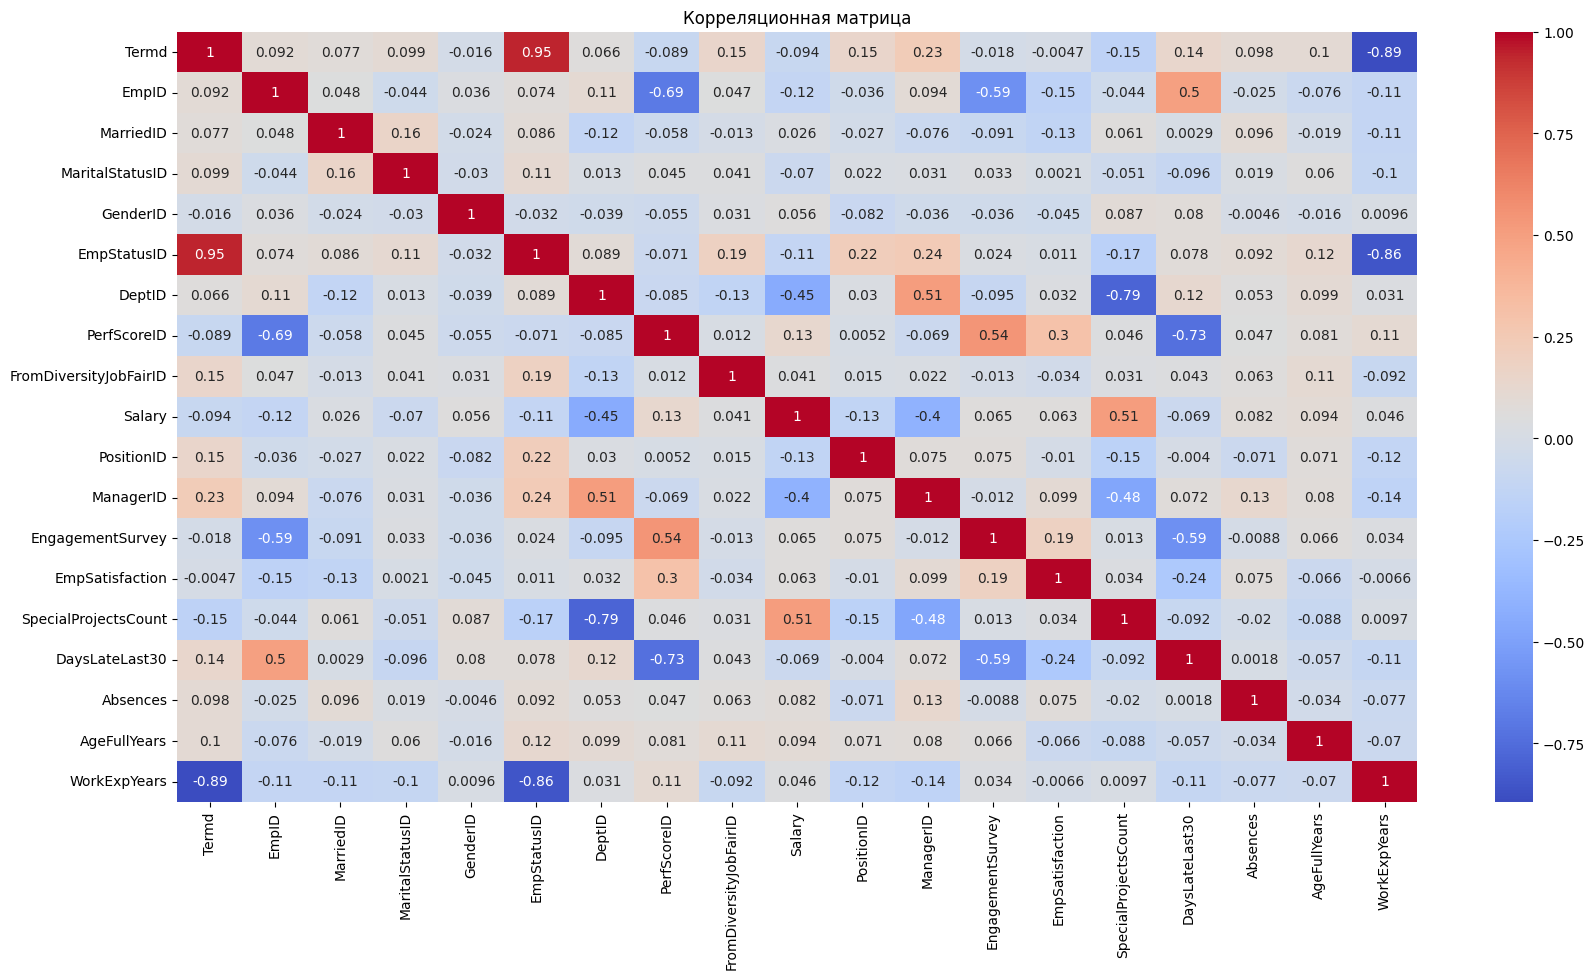

In [ ]:
# построим корреляционную матрицу для всех возможных признаков

correlation_matrix = dataset[['Termd','EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'PositionID', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences', 'AgeFullYears', 'WorkExpYears']].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

## <a id='salary'> Что можно сказать о распределении фонда оплаты труда?</a>

### Ответ на вопрос:

ФОТ распределен неравномерно, медианная заработная плата составляет 62 810$.

При этом максимальная заработная плата у CEO - 250 000$.
Самый большой ФОТ у Production, при этом у сотрудников этого подразделения самая низкая медианная зар. плата.

In [ ]:
salary_raw = pd.pivot_table(
    dataset,
    values = ['Salary'],
    index = ['Department'],
    aggfunc = ['mean', 'median', 'sum']
).reset_index().round(2)

In [ ]:
salary_raw

,Department,mean,median,sum
,,Salary,Salary,Salary
0,Admin Offices,71791.89,63003.0,646127
1,Executive Office,250000.00,250000.0,250000
2,IT/IS,97064.64,92328.5,4853232
3,Production,59953.55,59472.0,12530291
4,Sales,69061.26,65310.0,2140899
5,Software Engineering,94989.45,95660.0,1044884


In [ ]:
dataset['Salary'].describe()

,Salary
count,311.000000
mean,69020.684887
std,25156.636930
min,45046.000000
25%,55501.500000
50%,62810.000000
75%,72036.000000
max,250000.000000


<Axes: >

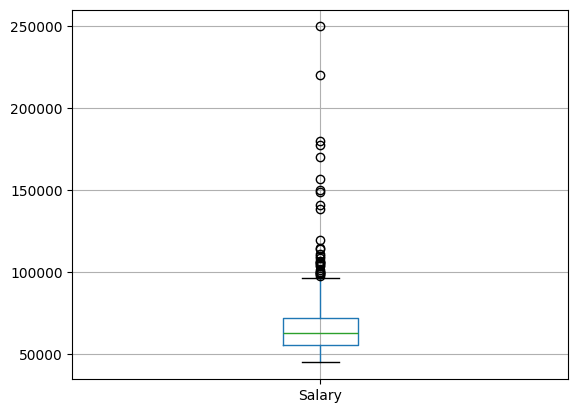

In [ ]:
dataset.boxplot(column='Salary')

<Axes: >

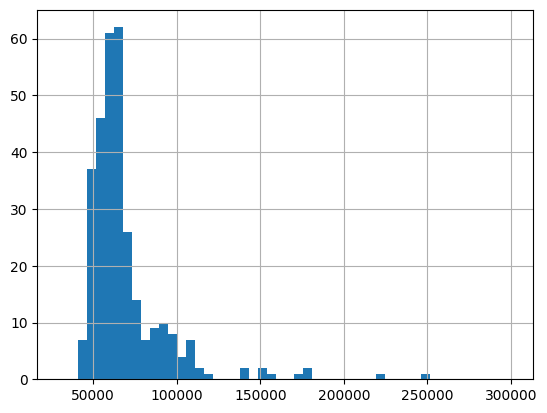

In [ ]:
dataset['Salary'].hist(bins=50, range=(30000,300000))

## <a id='perfomance'> Какие факторы влияют на эффективность сотрудников (Performance Score)?</a>

### Ответ на вопрос:

Можно выделить несколько факторов, которые могут влиять на эффективность сотрудников: опоздания за последние 30 дней, вовлеченность, удовлетворенность и заработная плата.

1. Наблюдается сильная отрицательная корреляция PerfScoreID с DaysLateLast30 (-0.73): чем больше опозданий за последние 30 дней, тем ниже оценка эффективности.
2. Наблюдается сильная положительная корреляция PerfScoreID с EngagementSurvey (0.54): чем выше вовлеченность сотрудников, тем выше оценка эффективности.
3. Наблюдается положительная корреляция PerfScoreID с EmpSatisfaction (0.3): чем выше удовлетворенность сотрудников, тем выше оценка эффективности.
4. Наблюдается слабая корреляция PerfScoreID с Salary (0.13): чем выше заработная плата, тем выше оценка эффективности.

In [ ]:
perf_raw = pd.pivot_table(
    dataset,
    values = ['Cnt'],
    index = ['PerfScoreID', 'PerformanceScore'],
    aggfunc = 'sum'
).reset_index()

perf_raw

,PerfScoreID,PerformanceScore,Cnt
0,1,Fully Meets,1
1,1,PIP,12
2,2,Needs Improvement,18
3,3,Fully Meets,242
4,3,PIP,1
5,4,Exceeds,37


Для двух сотрудников некорректно размечена оценка производительности: перепутаны либо PerfScoreID, либо PerformanceScore. Но это 0.6% от общего количества, поэтому пренебрежем

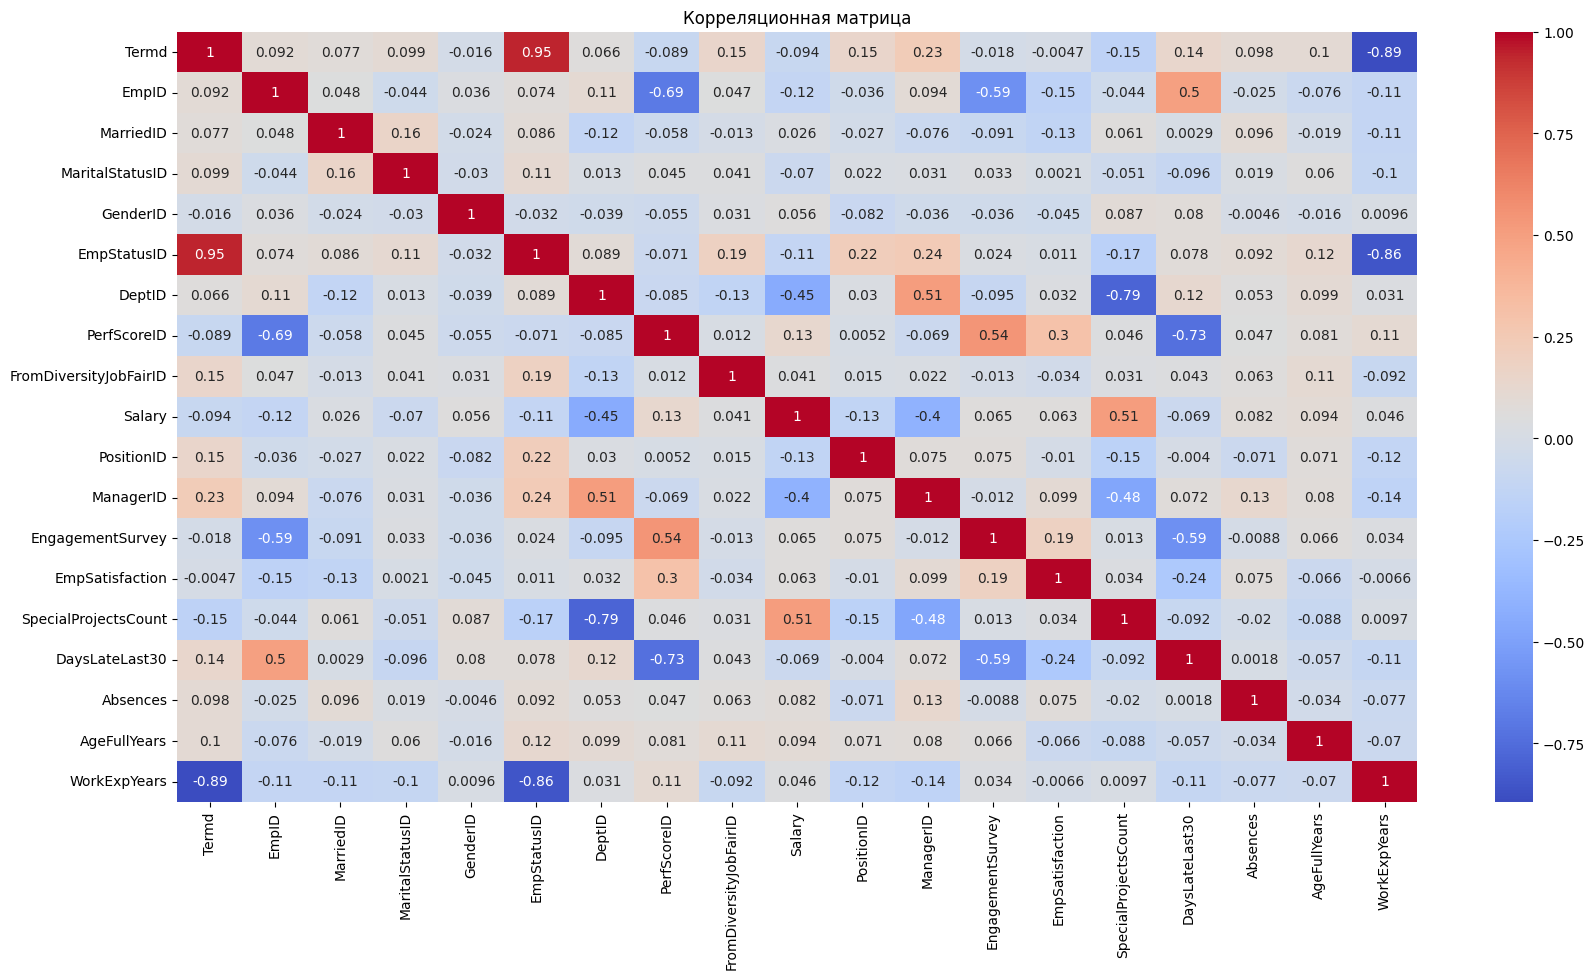

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# <a id='advanced'> Продвинутые вопросы </a>  

## <a id='perf_modal'> Предложи модель прогноза эффективности сотрудников. </a>

Создадим регрессионную модель на Python для прогнозирования оценки эффективности сотрудников (*PerfomanceScore*) на основе  датасета. Поскольку имеются корреляционные связи между оценкой эффективности и другими факторами (напр., количество опозданий, вовлеченность, удовлетворенность и зарплата), целесообразно использовать алгоритм машинного обучения, который справится с мультиколлинеарностью, например, градиентный бустинг деревьев (Gradient Boosting Regressor).

In [ ]:
# оставляем только интересующие нас признаки
#features = ['DaysLateLast30', 'EngagementSurvey', 'EmpSatisfaction', 'Salary']

features = ['MarriedID', 'MaritalStatusID', 'GenderID',
       'DeptID', 'FromDiversityJobFairID',
       'Salary', 'PositionID', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30','Absences', 'AgeFullYears', 'WorkExpYears']

target = 'PerfScoreID'

In [ ]:
# разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

In [ ]:
# масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# задание сетки гиперпараметров
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# создание модели и поиск лучших гиперпараметров
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# лучшие гиперпараметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# перепроектируем модель с лучшими гиперпараметрами
best_model = grid_search.best_estimator_

Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# прогнозирование на тестовых данных
predictions = best_model.predict(X_test_scaled)

# оценка качества модели
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"RMSE после оптимизации: {rmse}")
print(f"R² Score после оптимизации: {r2}")

RMSE после оптимизации: 0.30705243440689095
R² Score после оптимизации: 0.3388655957967115


* RMSE (Root Mean Square Error): Чем ближе к нулю, тем точнее прогнозы.
* R² (Коэффициент детерминации): Близость к 1 свидетельствует о хорошей способности модели объяснить вариацию целевой переменной.

Качество полученной модели оценивается как умеренное, исходя из полученных результатов:

* RMSE (среднеквадратическая ошибка) ≈ 0.30. Среднеквадратичное отклонение моделей принято оценивать относительно масштаба целевой переменной. Если шкала эффективности варьирует примерно от 1 до 5, то ошибка ±0.3 означает небольшую погрешность в оценке, но существенную, если требуется повышенная точность.
* R² (коэффициент детерминации) ≈ 0.34. Данный коэффициент показывает, насколько наша модель объясняет вариабельность целевой переменной. Значение 0.34 говорит о том, что модель объясняет примерно 34% дисперсии зависимой переменной. Значение ниже 0.5 не считается достаточным для надежной практики.

Причины низкой точности модели:
- Низкая значимость независимых переменных: возможно, имеющиеся факторы (опоздания, вовлеченность, удовлетворенность, зарплата) слабо влияют на оценку эффективности.
- Невысокая разнообразие наблюдений: выборка из ~300 сотрудников может оказаться недостаточной для точного моделирования нелинейных связей.
- Недостаточность данных: может потребоваться больше внешних факторов, связанных с профессиональными качествами, квалификацией или индивидуальными характеристиками сотрудников.

## <a id='education'> Представь, что в прошлом году в одном из департаментов было внедрено новое обучение. Придумай, как можно оценить эффективность этой меры. Смоделируй на данных. </a>

В данном контексте "эффективность обучения" я понимаю, как положительное влияние на сотрудников: повышение профессионального уровня сотрудников и поизводительности *PerfomanceScore*, снижение текучести кадров *Turnover* и повышение лояльности *EmpSatisfaction* и вовлеченности сотрудников *EngagementSurvey*.

**Гипотеза:**
Программа обучения позитивно сказалась на перечисленных метриках эффективности сотрудников, удовлетворенности, текучести и вовлеченности.

Чтобы оценить эффективность меры, можно применить:
1. А/B-тестирование (контрольная и экспериментальная группы):
Один департамент получает программу обучения (экспериментальная группа), другой — нет (контрольная группа).
2. Измерение метрик до и после внедрения:
Проводится сравнение метрик до и после программы обучения.
3. Интервью и обратная связь сотрудников:
Дополнительно к A/B-тестированию собираем отзывы и комментарии от участников обучения для качественного анализа.

На мой взгляд без предварительного дизайна А/B-тестирования нельзя точно определить эффективность обучения, т.к. на изменение метрик могло сказаться множество внешних и внутренних факторов.

## <a id='turnover_factors'> Какие ограничения есть у твоих данных? Какие выводы ты не стал бы делать? Как избежать ошибочной интерпретации результатов? </a>

1. Размер выборк.
В датасете представлено сравнительно небольшое количество сотрудников (311 человек: 104 уволенных и 207 действующих сотрудников). Маленькая выборка повышает риск систематических ошибок и снижает репрезентативность выводов.
2. Причины ухода сотрудников.
Всего в датасете встречается 17 типов причин увольнения и 104 уволенных, при анализе распределения по годам явных лидеров с большим перевесом среди причин обнаружено не было. Чтобы делать вывод о связи причин увольнения с текучестью необходимо провести боллее глубокий анализ. Например, если в причине указано "more money", нужно посмотреть дату последнего пересмотра з/п, где находится оклад сотрудника относительно медианы вилки и пр.
В ходе построения корреляционной матрицы для увольнений не было выявлено значимых корреляций. И важно помнить, что корреляция не равно причинно-следственная связь.
3. Одной общей оценки вовлеченности и удовлетворенности не достаточно.
Опрос вовлеченности (удовлетворенности) как правило складывается из нескольких факторов. Это могут быть удовлетворенность карьерой и развитием, системой вознаграждения; атмосфера в команде. Чтобы понять, за счет чего мог измениться общий показатель, необходимо "провалиться" вглубь.

Чтобы избежать ошибочной интерпретации необходимо учитывать:
1. Контекстные данные.
Выводы должны быть сделаны с учетом внешней среды и особенностей отрасли. В данном случае, мне неизвестна отрасль компании, данных которой я анализировала. По наименованиям должностей я видела, что есть "продажники" и ИТ-специалисты, но сформировать представление об отрасли я не смогла.
2. Представительность выборки.
Выборка данных должна быть репрезентативна. Недостаточное покрытие важных подгрупп может исказить результаты. Численность сотрудников компании состоит преимущественно из отдела Production.   
3. Корректная формулировка выводов.
Любые утверждения о связи причин увольнения и текучести должны подкрепляться объективными фактами и подтверждающими источниками.
4. Исследования в области причин ухода.
Сбор дополнительных качественных данных через опросы, интервью или фокус-группы поможет глубже разобраться в вопросах.
5. Комплексный подход.
Необходимо учитывать внешние обстоятельства, такие как экономические условия, конкуренция на рынке труда и пр.